In [5]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import geopandas as gpd
import folium 

shape_file = gpd.read_file('/Users/enzowurtele/Desktop/DATABASES/cb_2018_us_state_5m/cb_2018_us_state_5m.shp')

SuperStore_db = pd.read_csv('/Users/enzowurtele/Desktop/DATABASES/Sample-Superstore.csv', encoding='latin1')


In [6]:
pd.set_option('display.width', None)
pd.set_option('display.max_columns', None)

In [7]:
print(shape_file.columns)

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'NAME', 'LSAD',
       'ALAND', 'AWATER', 'geometry'],
      dtype='object')


In [8]:
SuperStore_db.head(10)

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,State,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,1,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-BO-10001798,Furniture,Bookcases,Bush Somerset Collection Bookcase,261.9600,2,0.00,41.9136
1,2,CA-2016-152156,11/8/2016,11/11/2016,Second Class,CG-12520,Claire Gute,Consumer,United States,Henderson,Kentucky,42420,South,FUR-CH-10000454,Furniture,Chairs,"Hon Deluxe Fabric Upholstered Stacking Chairs,...",731.9400,3,0.00,219.5820
2,3,CA-2016-138688,6/12/2016,6/16/2016,Second Class,DV-13045,Darrin Van Huff,Corporate,United States,Los Angeles,California,90036,West,OFF-LA-10000240,Office Supplies,Labels,Self-Adhesive Address Labels for Typewriters b...,14.6200,2,0.00,6.8714
3,4,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,FUR-TA-10000577,Furniture,Tables,Bretford CR4500 Series Slim Rectangular Table,957.5775,5,0.45,-383.0310
4,5,US-2015-108966,10/11/2015,10/18/2015,Standard Class,SO-20335,Sean O'Donnell,Consumer,United States,Fort Lauderdale,Florida,33311,South,OFF-ST-10000760,Office Supplies,Storage,Eldon Fold 'N Roll Cart System,22.3680,2,0.20,2.5164
5,6,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,FUR-FU-10001487,Furniture,Furnishings,Eldon Expressions Wood and Plastic Desk Access...,48.8600,7,0.00,14.1694
6,7,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AR-10002833,Office Supplies,Art,Newell 322,7.2800,4,0.00,1.9656
7,8,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,TEC-PH-10002275,Technology,Phones,Mitel 5320 IP Phone VoIP phone,907.1520,6,0.20,90.7152
8,9,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-BI-10003910,Office Supplies,Binders,DXL Angle-View Binders with Locking Rings by S...,18.5040,3,0.20,5.7825
9,10,CA-2014-115812,6/9/2014,6/14/2014,Standard Class,BH-11710,Brosina Hoffman,Consumer,United States,Los Angeles,California,90032,West,OFF-AP-10002892,Office Supplies,Appliances,Belkin F5C206VTEL 6 Outlet Surge,114.9000,5,0.00,34.4700


In [9]:
shape_file = shape_file.rename(columns={'NAME': 'State'})

merged_ShapeFile =  shape_file.merge(SuperStore_db, on='State', how='inner')

In [10]:
merged_ShapeFile.head()

,STATEFP,STATENS,AFFGEOID,GEOID,STUSPS,State,LSAD,ALAND,AWATER,geometry,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Customer Name,Segment,Country,City,Postal Code,Region,Product ID,Category,Sub-Category,Product Name,Sales,Quantity,Discount,Profit
0,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",22,CA-2016-137330,12/9/2016,12/13/2016,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,68025,Central,OFF-AR-10000246,Office Supplies,Art,Newell 318,19.46,7,0.0,5.0596
1,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",23,CA-2016-137330,12/9/2016,12/13/2016,Standard Class,KB-16585,Ken Black,Corporate,United States,Fremont,68025,Central,OFF-AP-10001492,Office Supplies,Appliances,"Acco Six-Outlet Power Strip, 4' Cord Length",60.34,7,0.0,15.6884
2,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",808,CA-2015-140921,2/3/2015,2/5/2015,First Class,AA-10375,Allen Armold,Consumer,United States,Omaha,68104,Central,FUR-FU-10003347,Furniture,Furnishings,Coloredge Poster Frame,28.40,2,0.0,11.0760
3,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",809,CA-2015-140921,2/3/2015,2/5/2015,First Class,AA-10375,Allen Armold,Consumer,United States,Omaha,68104,Central,TEC-AC-10004901,Technology,Accessories,Kensington SlimBlade Notebook Wireless Mouse w...,149.97,3,0.0,50.9898
4,31,01779792,0400000US31,31,NE,Nebraska,00,198956658395,1371829134,"POLYGON ((-104.05351 41.15726, -104.05267 41.2...",1509,CA-2017-108294,12/10/2017,12/10/2017,Same Day,LS-16975,Lindsay Shagiari,Home Office,United States,Omaha,68104,Central,OFF-BI-10004965,Office Supplies,Binders,Ibico Covers for Plastic or Wire Binding Elements,34.50,3,0.0,15.5250


In [11]:
print(merged_ShapeFile.columns)

Index(['STATEFP', 'STATENS', 'AFFGEOID', 'GEOID', 'STUSPS', 'State', 'LSAD',
       'ALAND', 'AWATER', 'geometry', 'Row ID', 'Order ID', 'Order Date',
       'Ship Date', 'Ship Mode', 'Customer ID', 'Customer Name', 'Segment',
       'Country', 'City', 'Postal Code', 'Region', 'Product ID', 'Category',
       'Sub-Category', 'Product Name', 'Sales', 'Quantity', 'Discount',
       'Profit'],
      dtype='object')


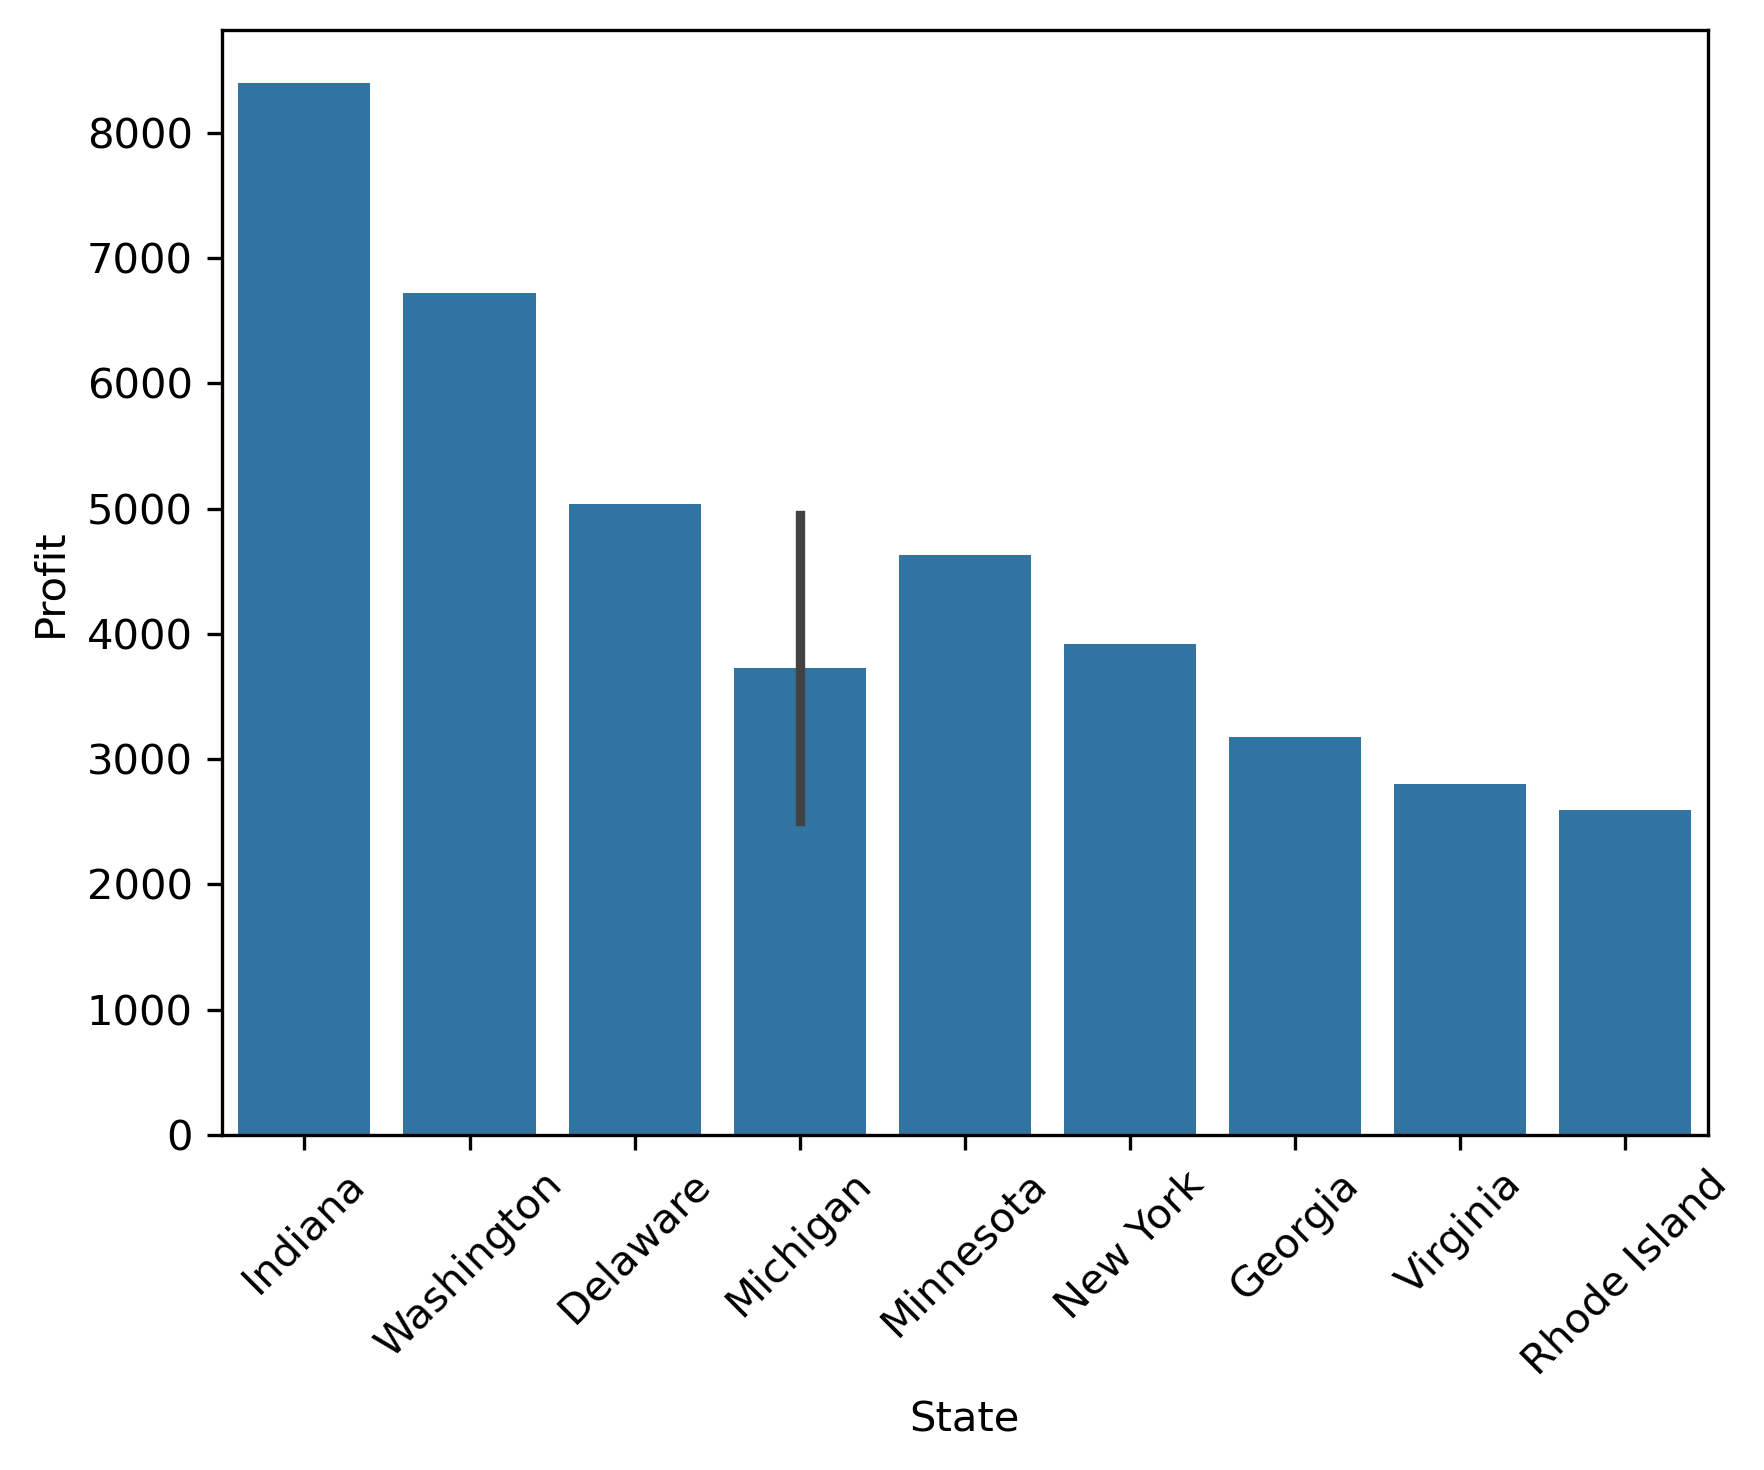

In [12]:
top_10_states = SuperStore_db.sort_values(by='Profit', ascending=False).head(10)

plt.figure(figsize=(6,5), dpi=300)
sns.barplot(data=top_10_states, x='State', y='Profit')
plt.xticks(rotation=45)
plt.tight_layout()